In [ ]:
# Akses dataset
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {"username":"ilhamsyukuryahya","key":"eb169aa06191ad1c4019e0c833f39efd"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!pip install kaggle
import kaggle

!kaggle datasets download -d kshitij192/cars-image-dataset --unzip kshitij192/cars-image-dataset

 96% 35.0M/36.3M [00:02<00:00, 23.0MB/s]
100% 36.3M/36.3M [00:02<00:00, 14.1MB/s]


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
        print(os.path.join(dirname))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Hello Guys!

Here we are going to create a Convolution Neural Network(CNN) model on **Car Images Dataset** which is used to predict cars of seven category i.e Audi,Hyundai Creta,Mahindra Scorpio,Rolls Royce,Maruti Suzuki Swift,Tata Safari and Toyota Innova.

## Why CNN?

As we know that image classification involves extraction of features from the image to observe some patterns in the dataset.
The CNN follows a hierarchical model which works on building a network, like a funnel, and finally gives out a fully-connected layer(dense layer) where all the neurons are connected to each other and the output is processed.CNNs are very effective in reducing the number of parameters without losing on the quality of models. Images have high dimensionality (as each pixel is considered as a feature) which suits the above described abilities of CNNs.In CNN dimensionalty reduction is achieved using a sliding window with a size less than that of the input matrix.

## Importing the required libraries

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Convolution2D,MaxPooling2D,Flatten #action detectionimport tensorflow
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython.display import HTML

## Importing data into tensorflow dataset object

### Lets we understand what ImageDataGenerator do...

This will run through image data and apply random transformations to each individual image as it is passed to the model so that it never sees the exact same image twice during training.<br/>
The benefit here is that the model will become more robust as it trains on images that are slightly distorted, and it helps to prevent the model from learning noise in the data such as where features are located in the image.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
IMAGE_SIZE = 128

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        '/content/Cars Dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        class_mode="sparse",
)

Found 3352 images belonging to 7 classes.


In [ ]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break

[[[0.178889   0.18522897 0.16594848]
  [0.17937633 0.18620364 0.16935979]
  [0.17986368 0.1871783  0.17277111]
  ...
  [0.17854428 0.18638742 0.16677958]
  [0.19655778 0.20440091 0.18479307]
  [0.22326885 0.231112   0.21150415]]

 [[0.17057955 0.17744663 0.14754686]
  [0.17252888 0.1784213  0.14803419]
  [0.17447819 0.17939596 0.14852153]
  ...
  [0.18049361 0.18833674 0.1687289 ]
  [0.19899443 0.20683756 0.18722972]
  [0.22716749 0.23501064 0.21540278]]

 [[0.20405523 0.22158939 0.19413841]
  [0.18943533 0.20502017 0.17756918]
  [0.17481545 0.18845095 0.16099997]
  ...
  [0.18244292 0.19028606 0.17067821]
  [0.20143108 0.20927422 0.18966638]
  [0.23106614 0.23890927 0.21930142]]

 ...

 [[0.70557594 0.7094975  0.72910535]
  [0.6784314  0.6813568  0.70146275]
  [0.6751575  0.6712359  0.6947653 ]
  ...
  [0.7438749  0.7556396  0.7830906 ]
  [0.7385143  0.750279   0.77773   ]
  [0.7331537  0.7449184  0.7723694 ]]

 [[0.7016773  0.7055989  0.72520673]
  [0.6784314  0.68038213 0.7009754 ]


In [ ]:
class_names = list(train_generator.class_indices.keys())
class_names

['Audi',
 'Hyundai Creta',
 'Mahindra Scorpio',
 'Rolls Royce',
 'Swift',
 'Tata Safari',
 'Toyota Innova']

In [ ]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        '/content/Cars Dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        class_mode="sparse"
)

Found 813 images belonging to 7 classes.


In [ ]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.81568635 0.8117648  0.80392164]
  [0.81568635 0.8116029  0.8042453 ]
  [0.81568635 0.8078432  0.8117648 ]
  ...
  [0.78823537 0.78823537 0.78823537]
  [0.78823537 0.78823537 0.78823537]
  [0.78823537 0.78823537 0.78823537]]

 [[0.81568635 0.8117648  0.80392164]
  [0.81568635 0.8117648  0.80392164]
  [0.81568635 0.8079928  0.8114654 ]
  ...
  [0.78823537 0.78823537 0.78823537]
  [0.78823537 0.78823537 0.78823537]
  [0.78823537 0.78823537 0.78823537]]

 [[0.81568635 0.8117648  0.80392164]
  [0.81568635 0.8117648  0.80392164]
  [0.81568635 0.80829287 0.8108654 ]
  ...
  [0.78823537 0.78823537 0.78823537]
  [0.78823537 0.78823537 0.78823537]
  [0.78823537 0.78823537 0.78823537]]

 ...

 [[0.3104053  0.3066341  0.3257909 ]
  [0.30965427 0.3057327  0.32534054]
  [0.30935425 0.30543268 0.32504052]
  ...
  [0.32793695 0.32793695 0.33578008]
  [0.29460043 0.29460043 0.30244356]
  [0.35865077 0.35865077 0.3664939 ]]

 [[0.3060442  0.30212262 0.32173046]
  [0.30684966 0.30306628 0.32225958]


## Creating the CNN model

### How to stack up layers?

There are three types of layers that make up the CNN which are the convolutional layers, pooling layers, and fully-connected layers. When these layers are stacked, a CNN architecture will be formed.<br/>
**Convolution->Relu->Pooling->Convolution->Relu->Pooling->Flattening->Fully Connected layer**

CNN Layer-This layer is the first layer that is used to extract the various features from the input images.

Pooling layer-It is to decrease the size of the convolved feature map to reduce the computational costs. This is performed by decreasing the connections between layers and independently operates on each feature map.

Fully Connected layer-It consists of the weights and biases along with the neurons and is used to connect the neurons between two different layers.

Dropout-To overcome overfitting problem, a dropout layer is utilised wherein a few neurons are dropped from the neural network during training process resulting in reduced size of the model.

Relu Activation Function-It decides which information of the model should be send in the forward direction and which ones should not at the end of the network.

In [ ]:
sz = 128

# Initializing the CNN
model = Sequential()

# First convolution layer and pooling
model.add(Convolution2D(32, (3, 3), input_shape=(sz, sz, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Second convolution layer and pooling
model.add(Convolution2D(32, (3, 3), activation='relu'))
# input_shape is going to be the pooled feature maps from the previous convolution layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the layers
model.add(Flatten())

# Adding a fully connected layer
model.add(Dense(units=96, activation='relu'))
model.add(Dropout(0.40))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=7, activation='softmax')) # softmax for more than 2

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 28800)             0         
                                                                 
 dense (Dense)               (None, 96)                2

## Compiling the model

In [ ]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=50
)

Epoch 1/50
105/105 [==============================] - 21s 197ms/step - loss: 1.8492 - accuracy: 0.2825 - val_loss: 1.7051 - val_accuracy: 0.3801
Epoch 2/50
105/105 [==============================] - 20s 189ms/step - loss: 1.6738 - accuracy: 0.3789 - val_loss: 1.5859 - val_accuracy: 0.4514
Epoch 3/50
105/105 [==============================] - 19s 180ms/step - loss: 1.5455 - accuracy: 0.4338 - val_loss: 1.4145 - val_accuracy: 0.5031
Epoch 4/50
105/105 [==============================] - 20s 189ms/step - loss: 1.4120 - accuracy: 0.4836 - val_loss: 1.3712 - val_accuracy: 0.5031
Epoch 5/50
105/105 [==============================] - 19s 179ms/step - loss: 1.2983 - accuracy: 0.5355 - val_loss: 1.2107 - val_accuracy: 0.5793
Epoch 6/50
105/105 [==============================] - 20s 189ms/step - loss: 1.2160 - accuracy: 0.5573 - val_loss: 1.1804 - val_accuracy: 0.5793
Epoch 7/50
105/105 [==============================] - 21s 196ms/step - loss: 1.1331 - accuracy: 0.5940 - val_loss: 1.1276 - val_ac

In [ ]:
scores = model.evaluate(test_generator)

26/26 [==============================] - 5s 175ms/step - loss: 1.2750 - accuracy: 0.7036


In [ ]:
scores

[1.274960994720459, 0.7035670280456543]

In [ ]:
# Simpan model
model.save('model.h5')

## Plotting the accuracy and loss curves

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
type(history.history['loss'])

list

In [ ]:
len(history.history['loss'])

50

In [ ]:
history.history['loss'][:5] # show loss for first 5 epochs

[1.8491753339767456,
 1.6738466024398804,
 1.54551100730896,
 1.4119713306427002,
 1.2982991933822632]

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

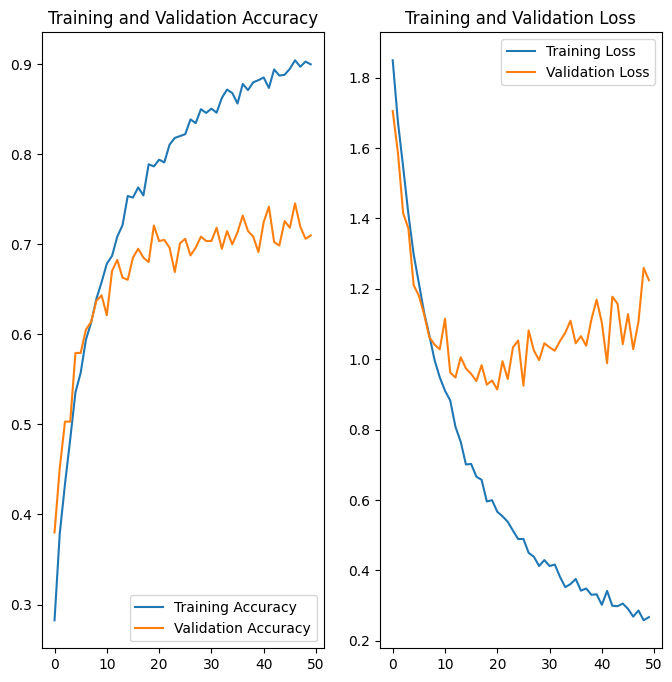

In [ ]:
import matplotlib.pyplot as plt
EPOCHS = 50

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Testing the prediction on sample of image from test dataset

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 19ms/step


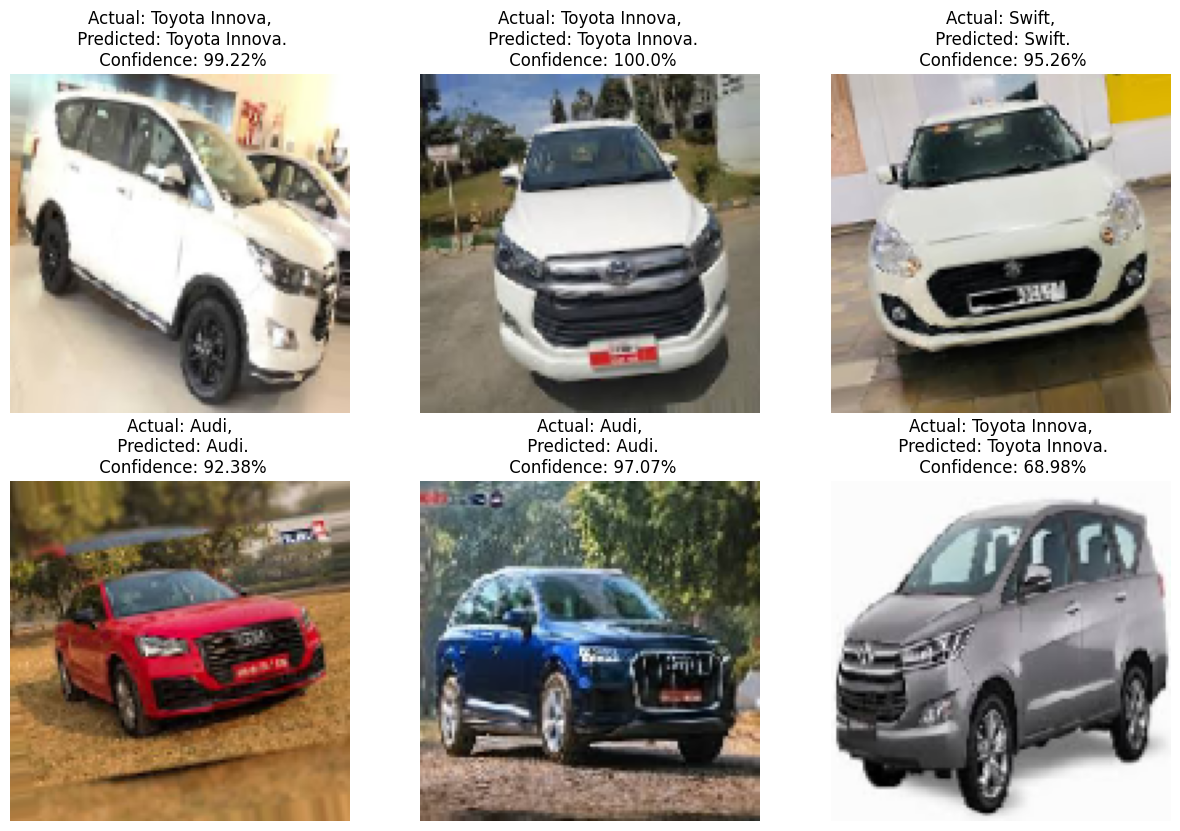

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])

        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")
    break

In [ ]:
import os
# Menghitung jumlah file dalam setiap label di direktori train

train_path = '/content/Cars Dataset/train'

number_label = {}
total_files = 0

# Memeriksa keberadaan direktori
if os.path.isdir(train_path):
    # Menghitung jumlah file dalam setiap label
    for label in os.listdir(train_path):
        label_path = os.path.join(train_path, label)
        if os.path.isdir(label_path):
            counting = len(os.listdir(label_path))
            number_label[label] = counting
            total_files += counting

    # Menampilkan hasil
    print("Jumlah file dalam setiap label:")
    for label, count in number_label.items():
        print(f"{label}: {count}")

    print(f"Total file: {total_files}")
else:
    print(f"Direktori '{train_path}' tidak ditemukan.")

Jumlah file dalam setiap label:
Audi: 814
Tata Safari: 441
Rolls Royce: 311
Swift: 424
Mahindra Scorpio: 316
Hyundai Creta: 271
Toyota Innova: 775
Total file: 3352


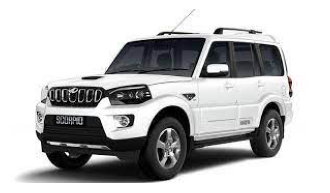

Hasil prediksi: Mahindra Scorpio
Persentase: 99.98%


In [ ]:
from keras.layers import Input, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Flatten
from keras.models import Model, load_model
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing import image
import numpy as np
import keras.utils as image
import tensorflow as tf
from PIL import Image
# Siapkan model
model = load_model('model.h5')

input_size=(128,128)

# Preprocess gambar untuk uji model
img_path = '/content/mahindra4.jpeg'
img = image.load_img(img_path, target_size=input_size[:2])
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

# Nama kelas
class_names = ['Audi',
 'Hyundai Creta',
 'Mahindra Scorpio',
 'Rolls Royce',
 'Swift',
 'Tata Safari',
 'Toyota Innova']

# Mendefinisikan tf.function untuk prediksi agar performa baik
@tf.function
def predict(image_array):
    return model(image_array)

# Buat prediksi dari gambar
predictions = predict(tf.convert_to_tensor(img_array))

# Ambil indeks hasil prediksi
predicted_class_index = np.argmax(predictions)

# Ambil kelas berdasarkan indeks
predicted_class_name = class_names[predicted_class_index]

# Ambil probabilitas untuk kelas hasil prediksi
predicted_probability = predictions[0][predicted_class_index]

predicted_accuracy = predicted_probability * 100

img = Image.open(img_path)

fig, ax = plt.subplots(figsize=(4, 3))

ax.imshow(img)
ax.axis('off')
plt.show()

print("Hasil prediksi:", predicted_class_name)
print("Persentase: {:.2f}%".format(predicted_accuracy))

#### Thus, here almost all the images are predicted accurately.

## If you find this notebook useful please upvote it!